In [1]:
import glob

import numpy as np

import librosa


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


import os
import pickle
import warnings
from sklearn import preprocessing
from scipy.io.wavfile import read
import python_speech_features as mfcc
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import f1_score
import joblib



# def calculate_delta(array):
   
#     rows, cols = array.shape
#     # print(rows)
#     # print(cols)
#     deltas = np.zeros((rows,20))
#     N = 2
#     for i in range(rows):
#         index = []
#         j = 1
        
#         while j <= N:
#             if i-j < 0:
#                 first =0
#             else:
#                 first = i-j
#             if i+j > rows-1:
#                 second = rows-1
#             else:
#                 second = i+j 
#             index.append((second,first))
#             j+=1
#         deltas[i] = ( array[index[0][0]]-array[index[0][1]] + (2 * (array[index[1][0]]-array[index[1][1]])) ) / 10
#     return deltas
def remove_noise(data):
    data= librosa.effects.preemphasis(data)
    return data
def extract_features(data,sr):
    mfcc= librosa.feature.mfcc(y= data,sr=sr,n_mfcc=30)  
    #print(mfcc.shape) 
    delta = librosa.feature.delta(mfcc)
    #print(delta.shape)
    delta_2 = librosa.feature.delta(delta)
    #Combine MFCC and Delta features
    combined_feat = np.concatenate((mfcc,delta,delta_2))
    #features.append(combined_feat.T)
    return combined_feat.T
    #print(features)


# def extract_features(audio,rate):
       
#     mfcc_feature = mfcc.mfcc(audio, rate, 0.025, 0.01, 20, nfft = 2205, appendEnergy = True)    
#     mfcc_feature = preprocessing.scale(mfcc_feature)
# #     print(mfcc_feature)
#     delta = calculate_delta(mfcc_feature)
#     combined = np.hstack((mfcc_feature, delta)) 
#     return combined
gmm_files = [ i + '.joblib1' for i in ['manar', 'salma', 'sara','yasmeen','others']]

models    = [joblib.load(fname) for fname in gmm_files]
speakers   = [fname.split("\\")[-1].split(".joblib")[0] for fname 
                  in gmm_files]

y = []

file = r'F:\task005\output.wav'
audio, sr = librosa.load(file)
vector = extract_features(audio, sr)
log_likelihood = np.zeros(len(models)) 
for i in range(len(models)):
    gmm    = models[i] 
    scores = np.array(gmm.score(vector))
    log_likelihood[i] = scores.sum()

y.append(log_likelihood)
print(y)

winner = np.argmax(log_likelihood)
print(winner)
# Flag to detect the other person that aren't in the group 
# flag=False
# flagLst=log_likelihood-max(log_likelihood)
# for i in range(len(flagLst)):
#     if  flagLst[i]==0:
#         continue
#     if abs(flagLst[i])<0.5:
#         flag=True

# if flag:
#     winner=4


# Map the numeric label back to the original speaker name
predicted_speaker = {0: "manar", 1: "salma", 2: "sara", 3: "yasmeen", 4: "unknown"}.get(winner, "unknown")

print(f"Predicted Speaker: {predicted_speaker}")



[array([-134.72657391, -139.54593985, -146.55957283, -139.20880309,
       -147.17163436])]
0
Predicted Speaker: manar


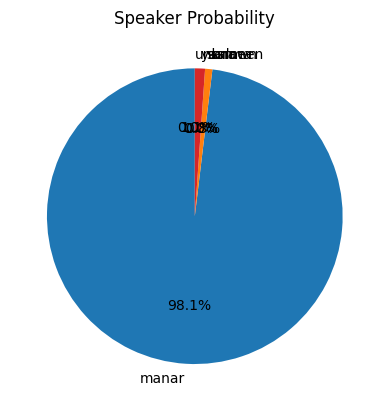

In [2]:
import numpy as np
import librosa
import joblib
import matplotlib.pyplot as plt

# ... (your existing code)

# Rest of your code

# Calculate probabilities
probabilities = np.exp(y) / np.sum(np.exp(y))

# Plotting the pie chart
labels = ["manar", "salma", "sara", "yasmeen", "unknown"]
plt.pie(probabilities[0], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Speaker Probability")
plt.show()

